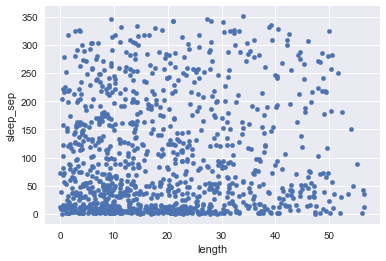

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import random

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

sns.set()
%matplotlib inline

couplesDF = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/sleeping-alone-data/sleeping-alone-data.csv', encoding="ANSI")
cDF = couplesDF
cDF = cDF.drop(columns=['StartDate','EndDate'])
cDF.columns = ['status', 'length', 'sleep_sep', 'loc_self', 'e', 'loc_part', 'g', 'snore', 'bathroom',
               'sick', 'physical', 'temp', 'argue', 'space','covers', 'child', 'dif_times', 'other_reason', 
               'first_time', 'stay_tog', 'sleep_better', 'sex_life', 'occupation', 'w', 'gender', 'age', 'house_income',
               'education','location']
saveDF = cDF

cDF = cDF.drop(columns=['loc_self', 'e', 'loc_part', 'g', 'bathroom',
              'sick', 'physical', 'temp', 'argue', 'space','covers', 'child', 'dif_times', 'other_reason',
                       'occupation','w'])
cDF.shape
cDF = cDF.drop(0)


cDF['status'] = cDF['status'].replace("Married", "m").replace("Single, but cohabiting with a significant other","ss").replace("In a domestic partnership or civil union","dp").replace("Separated","sep").replace("Divorced","d").replace("Widowed","w")
cDF['length'] = cDF['length'].replace("1-5 years", 3).replace("Less than 1 year",.5).replace("More than 20 years",20).replace("6-10 years",8).replace("16-20 years" ,18).replace("11-15 years",13)
cDF['sleep_sep'] = cDF['sleep_sep'].replace("Once a year or less", 1).replace("A few times per month",36).replace("Never",0).replace("Every night",365).replace("A few times per week",156).replace("Once a month or less",12)
cDF['first_time'] = cDF['first_time'].replace("Within the first 1-5 years of our relationship",2.5).replace("Immediately/ We've always slept in separate beds",0).replace("Within 6-10 years of our relationship",8).replace("Within 11-15 years of our relationship",13).replace("Within 16-20 years of our relationship",18).replace("After 20 years of our relationship",20)
cDF['stay_tog'] = cDF['stay_tog'].replace("Strongly agree",5).replace("Somewhat agree",4).replace("Neither agree nor disagree",3).replace("Somewhat disagree",2).replace("Strongly disagree",1)
cDF['sleep_better'] = cDF['sleep_better'].replace("Strongly agree",5).replace("Somewhat agree",4).replace("Neither agree nor disagree",3).replace("Somewhat disagree",2).replace("Strongly disagree",1)
cDF['sex_life'] = cDF['sex_life'].replace("Strongly agree",5).replace("Somewhat agree",4).replace("Neither agree nor disagree",3).replace("Somewhat disagree",2).replace("Strongly disagree",1)

cDF = cDF.dropna(thresh=2)

for row in cDF.itertuples():
    if cDF.loc[row.Index, 'length'] == 3:
        cDF.at[row.Index, 'length'] = random.uniform(1,6)
    elif cDF.loc[row.Index, 'length'] == .5:
        cDF.at[row.Index, 'length'] = random.uniform(0,1)
    elif cDF.loc[row.Index, 'length'] == 20:
        cDF.at[row.Index, 'length'] = random.triangular(20,60,20)
    elif cDF.loc[row.Index, 'length'] == 8:
        cDF.at[row.Index, 'length'] = random.uniform(6,10)
    elif cDF.loc[row.Index, 'length'] == 13:
        cDF.at[row.Index, 'length'] = random.uniform(10,15)
    elif cDF.loc[row.Index, 'length'] == 18:
        cDF.at[row.Index, 'length'] = random.uniform(15,20)
        
        
    if cDF.loc[row.Index, 'sleep_sep'] == 0:
        cDF.at[row.Index, 'sleep_sep'] = random.betavariate(1,3)*365
    elif cDF.loc[row.Index, 'sleep_sep'] == 1:
        cDF.at[row.Index, 'sleep_sep'] = random.triangular(0,6,1)
    elif cDF.loc[row.Index, 'sleep_sep'] == 12:
        cDF.at[row.Index, 'sleep_sep'] = random.triangular(3,21,12)
    elif cDF.loc[row.Index, 'sleep_sep'] == 36:
        cDF.at[row.Index, 'sleep_sep'] = random.triangular(24,60,36)
    elif cDF.loc[row.Index, 'sleep_sep'] == 156:
        cDF.at[row.Index, 'sleep_sep'] = random.triangular(56,256,156)
    elif cDF.loc[row.Index, 'sleep_sep'] == 365:
        cDF.at[row.Index, 'sleep_sep'] = random.triangular(150,365,300)
cDF.plot.scatter(x='length',y='sleep_sep')

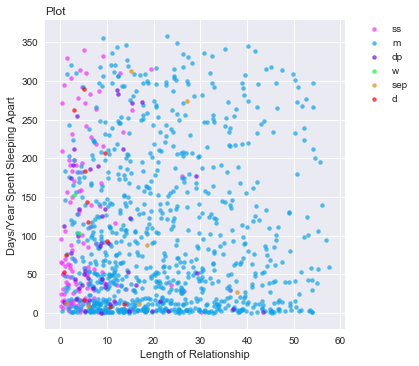

In [9]:

sns.lmplot('length', 'sleep_sep', data=cDF, fit_reg=False,hue='status',legend=False,
          palette=dict(ss="#F52FFF", sep="#E88A0C", d="#FF0000",dp="#730CE8",m="#0CA4E8",w="#00FF37"),
            scatter_kws={"alpha":0.7,"s":20})
plt.xlabel('Length of Relationship')
plt.ylabel('Days/Year Spent Sleeping Apart')
plt.title('Plot', loc='left')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("myfig.png")

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


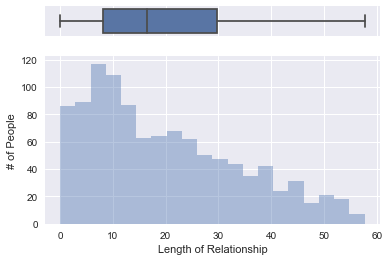

In [10]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(cDF['length'],ax=ax_box)
sns.distplot( a=cDF['length'], kde=False, bins= 20,norm_hist=False,
kde_kws={"color": "b", "alpha":0.1, "linewidth": 1, "shade":True }, ax=ax_hist)
 
# Add a graph in each part
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_hist.set(xlabel="Length of Relationship",ylabel="# of People")
f.savefig("myfig2.png")

In [12]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff


table1 = cDF[['status','length','sleep_sep','snore']].fillna("No")
table1 = table1.sample(frac=0.1)
table1 = table1.round(1)
tablefile = go.Table(
    header=dict(values=['Relationship Status', 'Length of Relationship', 'Frequency Sleeping Separate','Does your Partner Snore?'],
                fill = dict(color='#C2D4FF'),
                align = ['left'] * 5),
    cells=dict(values=[table1.status,table1.length,table1.sleep_sep,table1.snore],
               fill = dict(color='#F5F8FF'),
               align = ['left'] * 5))

datatable = [tablefile] 
figtable = go.Figure(data=datatable)
py.iplot(datatable, filename = 'example_sample')
table2 = saveDF[['status','length','sleep_sep','snore']].fillna("No")
table2 = table2.sample(frac=0.1)
table2 = table2.round(1)
tablefile2 = go.Table(
    header=dict(values=['Relationship Status', 'Length of Relationship', 'Frequency Sleeping Separate','Does your Partner Snore?'],
                fill = dict(color='#C2D4FF'),
                align = ['left'] * 5),
    cells=dict(values=[table2.status,table2.length,table2.sleep_sep,table2.snore],
               fill = dict(color='#F5F8FF'),
               align = ['left'] * 5))

datatable2 = [tablefile2] 
figtable2 = go.Figure(data=datatable2)
py.iplot(datatable2, filename = 'example_sample')

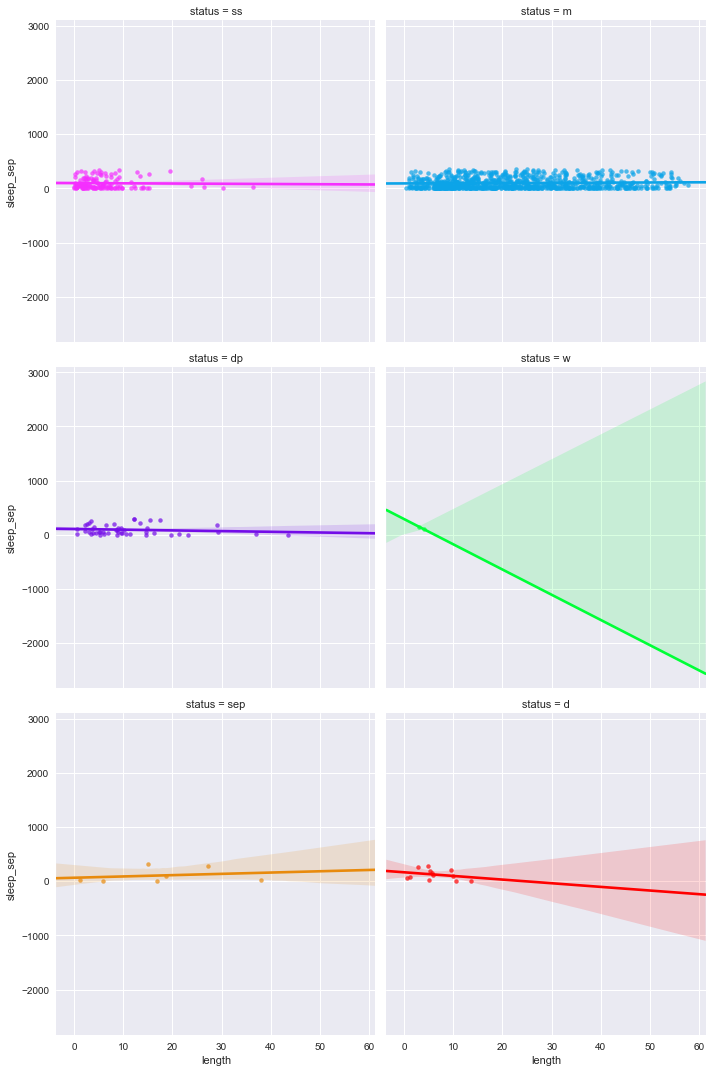

In [34]:
sns.lmplot('length', 'sleep_sep', data=cDF, fit_reg=True,hue='status',col_wrap=2,col='status',legend=False,
          palette=dict(ss="#F52FFF", sep="#E88A0C", d="#FF0000",dp="#730CE8",m="#0CA4E8",w="#00FF37"),
            scatter_kws={"alpha":0.7,"s":20})
plt.savefig("myfig3.png")

In [35]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

train_set, test_set = train_test_split(cDF[['length','sleep_sep']], test_size=0.2, random_state=42)

In [36]:
df_copy = train_set.copy()

In [53]:
formula = 'sleep_sep ~ length'
lin_reg = smf.ols(formula, data=cDF.loc[cDF['status'] == 'ss']).fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sleep_sep   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                   0.08627
Date:                Sat, 15 Dec 2018   Prob (F-statistic):              0.769
Time:                        19:51:53   Log-Likelihood:                -819.14
No. Observations:                 136   AIC:                             1642.
Df Residuals:                     134   BIC:                             1648.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     97.7297     12.233      7.989      0.000      73.534     121.925
length        -0.4282      1.458     -0.294      0.769      -3.312       2.455
==============================================================================
Omnibus:                       19.289   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.093
Skew:                           1.020   Prob(JB):                     5.86e-06
Kurtosis:                       2.704   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

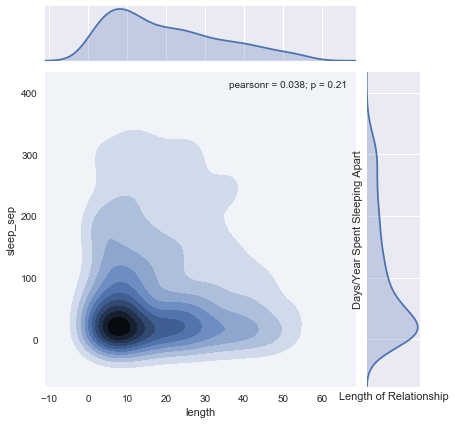

In [54]:
sns.jointplot(x='length', y='sleep_sep', data=cDF, kind="kde")
plt.xlabel('Length of Relationship')
plt.ylabel('Days/Year Spent Sleeping Apart')
plt.savefig("myfig4.png")

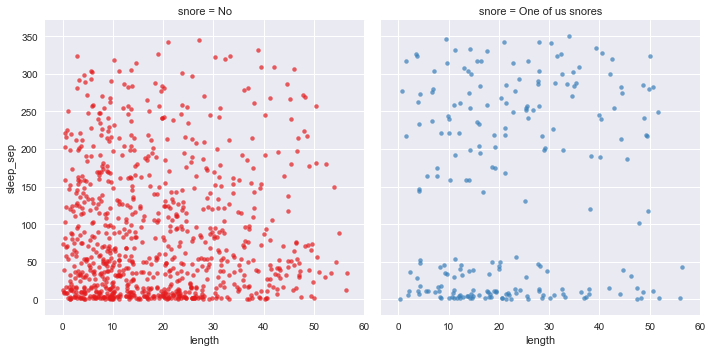

In [71]:
cDF['snore'].fillna("No",inplace=True)
sns.lmplot('length', 'sleep_sep', data=cDF, fit_reg=False,hue='snore',col='snore',legend=False,palette='Set1',
            scatter_kws={"alpha":0.7,"s":20})
plt.savefig('myfig6.png')